# 1. Set up environment and load training data

In [1]:
from google.colab import drive
drive.mount('/drive', force_remount=True)

%cd '/drive/MyDrive/Colab Notebooks/Projects/House Price Competition'

Mounted at /drive
/drive/MyDrive/Colab Notebooks/Projects/House Price Competition


In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
  html = f'<h3>{title}</h3>'
  html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
  html += df.to_html()
  html += '</div>'
  return html

In [7]:
train_df = pd.read_csv('train.csv', index_col='Id')

# remove rows with missing target – SalePrice
train_df.dropna(axis=0, subset=['SalePrice'], inplace=True)

html_train_df = create_scrollable_table(train_df, 'training_data', 'Training data')

display(HTML(html_train_df))

Output hidden; open in https://colab.research.google.com to view.

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

# 3. Exploratory data analysis (EDA)

In [59]:
X_eda = train_df.copy()

## 3.1. Null value analysis

In [62]:
def null_statistics(df):

    # Create a DataFrame to show column information
    null_info = pd.DataFrame({
        'Column Name': df.columns,
        'Column Data Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        'Null Percentage': df.isnull().mean() * 100
    })

    null_info.reset_index(drop=True, inplace=True)  # Reset the index

    # Display the DataFrame
    null_info = null_info[null_info["Null Values"] > 0]
    null_info = null_info.sort_values(by = 'Null Values', ascending = False).reset_index(drop=True)

    print("")
    print(f"There are {null_info.shape[0]} columns ({null_info.shape[0] / len(df.columns) * 100:,.2f} %) with Null values out of {len(df.columns)} columns in Dataframe.")
    print("")

    return null_info

train_null_data = null_statistics(X_eda)

train_null_data


There are 19 columns (23.75 %) with Null values out of 80 columns in Dataframe.



,Column Name,Column Data Type,Null Values,Null Percentage
0,PoolQC,object,1453,99.520548
1,MiscFeature,object,1406,96.301370
2,Alley,object,1369,93.767123
3,Fence,object,1179,80.753425
4,MasVnrType,object,872,59.726027
5,FireplaceQu,object,690,47.260274
6,LotFrontage,float64,259,17.739726
7,GarageType,object,81,5.547945
8,GarageYrBlt,float64,81,5.547945
9,GarageFinish,object,81,5.547945


## 3.2. Explore numerical features

In [63]:
columns_num = X_eda.select_dtypes(include='number')
columns_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


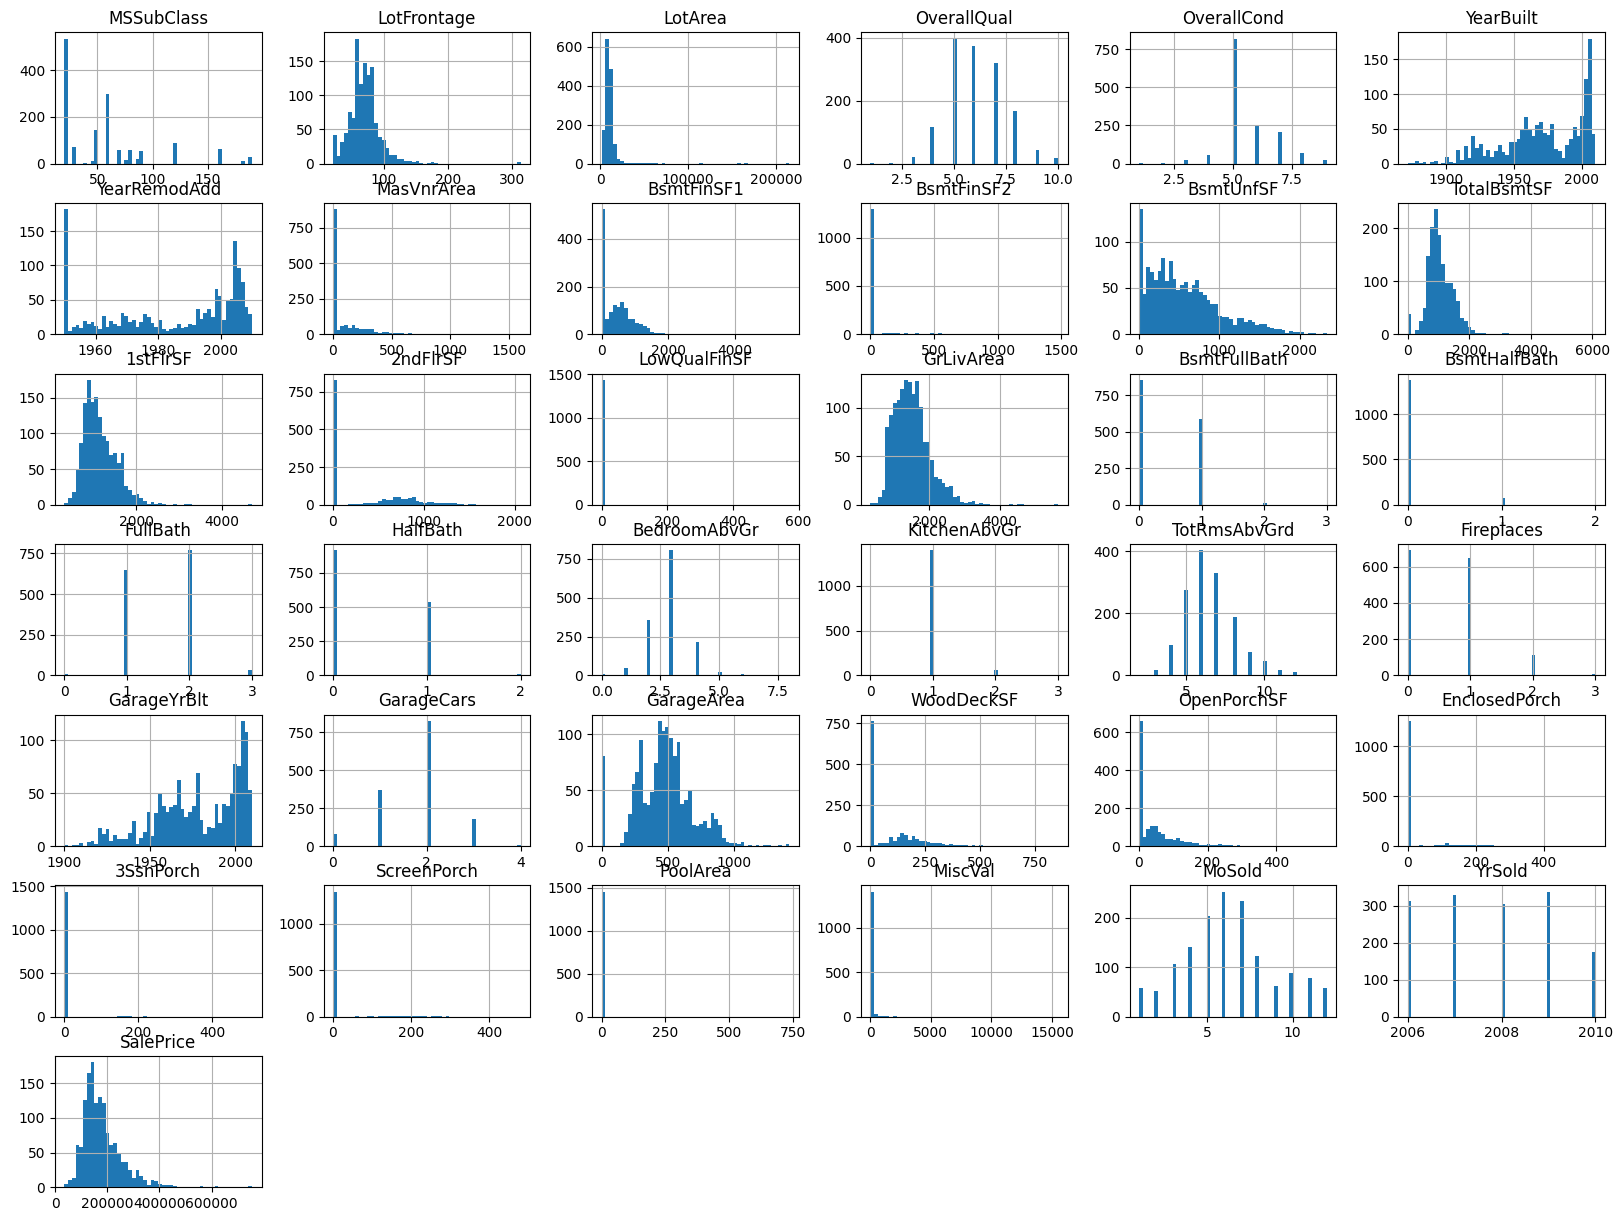

In [64]:
X_eda.hist(bins=50, figsize=(20,15))
plt.show()

## 3.3. Explore categorical features

In [65]:
columns_cat = X_eda.select_dtypes(include='object')
columns_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [66]:
for col in columns_cat.columns:
  print(columns_cat[col].value_counts())
  print('-' * 30)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
------------------------------
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
------------------------------
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
------------------------------
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
------------------------------
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Nr

## 3.4. Correlation analysis

In [67]:
corr_matrix = columns_num.corr()

In [68]:
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


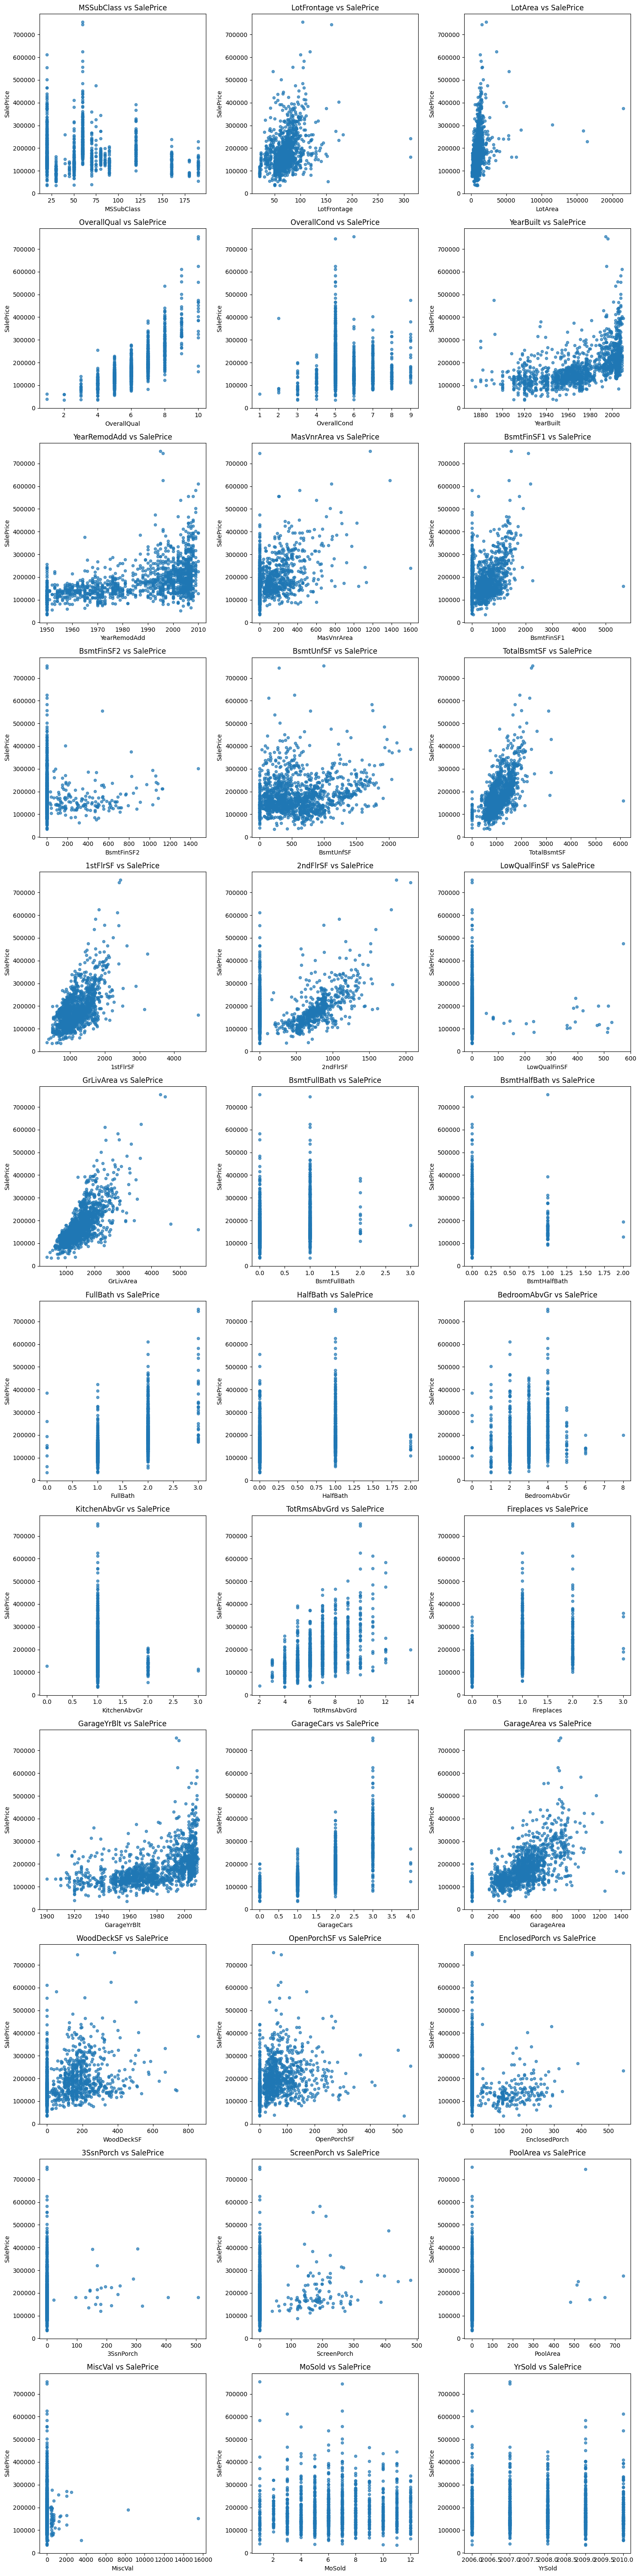

In [69]:
# Specify the column to use as the y-axis
y_column = 'SalePrice'

# Get the list of columns for the x-axis, excluding the y-axis column
x_columns = [col for col in columns_num.columns if col != y_column]

# Set up a grid for the subplots; adjust rows and cols based on the number of x_columns
n_cols = 3  # Number of columns in the plot grid
n_rows = (len(x_columns) + n_cols - 1) // n_cols  # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and create a scatter plot
for i, x_column in enumerate(x_columns):
    X.plot(kind='scatter', x=x_column, y=y_column, alpha=0.7, ax=axes[i], title=f'{x_column} vs {y_column}')

# Hide any unused subplots (if the number of x_columns doesn't fill the grid)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# X_eda['OverallQual'].value_counts()

## 3.5. Target analysis

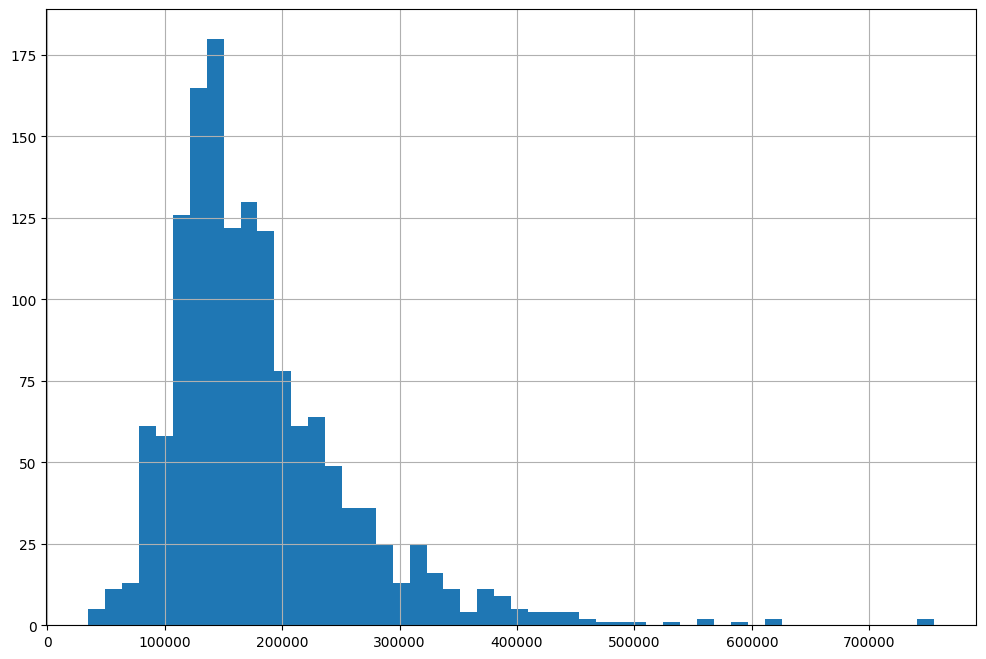

In [72]:
X_eda['SalePrice'].hist(bins=50, figsize=(12, 8))
plt.show()

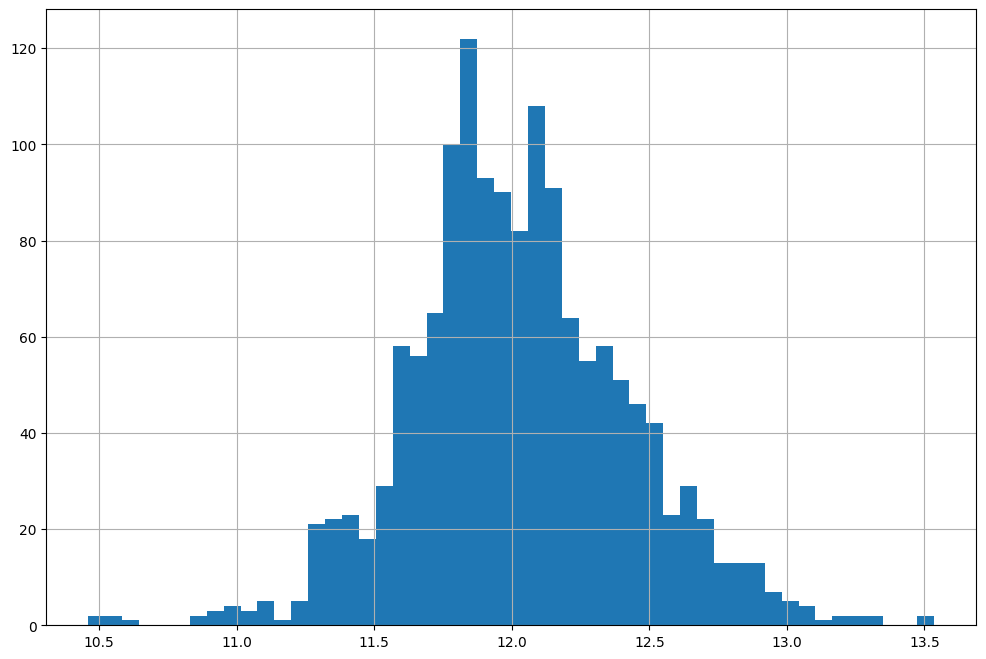

In [73]:
np.log(X_eda['SalePrice']).hist(bins=50, figsize=(12, 8))
plt.show()

# 4. Create pipeline for data preprocessing

In [33]:
X = train_df.copy()

# separate predictors from target
y = X['SalePrice']

# transform y to handle skewness
y = np.log(y)

X.drop('SalePrice', axis=1, inplace=True)

X.reset_index(drop=True, inplace=True) # otherwise, one-hot encoder would cause NaN value

## 4.1. Handle missing values

In [10]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# to impute numerical features
class NumericalImputer(BaseEstimator, TransformerMixin):
  def __init__(self, n_neighbors=5):
    self.n_neighbors = n_neighbors
    self.num_imputer = KNNImputer(n_neighbors=self.n_neighbors, weights='distance')
    self.columns_ = None  # Store the numerical columns for later use

  def fit(self, X, y=None):
    # Store the numerical columns in the training data
    self.columns_ = X.select_dtypes(include='number').columns
    # Fit the imputer on the training data
    self.num_imputer.fit(X[self.columns_])

    return self # return the instance of NumericalImputer

  def transform(self, X, y=None):
    # Check if columns were fitted
    if self.columns_ is None:
        raise RuntimeError("You must fit the imputer before transforming data.")

    # Apply the imputer to the numerical columns
    X_imputed = X.copy()  # Make a copy to avoid modifying the original DataFrame
    X_imputed[self.columns_] = self.num_imputer.transform(X[self.columns_])

    return X_imputed

# to impute categorical features
class CategoricalImputer(BaseEstimator, TransformerMixin):
  def __init__(self, fill_value='Unknown'):
    self.fill_value = fill_value
    self.cat_imputer = SimpleImputer(strategy='constant', fill_value=self.fill_value)
    self.columns_ = None  # Store the categorical columns for later use

  def fit(self, X, y=None):
    # Store the categorical columns in the training data
    self.columns_ = X.select_dtypes(include='object').columns
    # Fit the imputer on the categorical columns
    self.cat_imputer.fit(X[self.columns_])

    return self

  def transform(self, X, y=None):
    # Check if columns were fitted
    if self.columns_ is None:
        raise RuntimeError("You must fit the imputer before transforming data.")

    # Apply the imputer to the categorical columns
    X_imputed = X.copy()  # Make a copy to avoid modifying the original DataFrame
    X_imputed[self.columns_] = self.cat_imputer.transform(X[self.columns_])

    return X_imputed

In [35]:
X_filled = X.copy()

# initialize imputers
num_imputer = NumericalImputer()
cat_imputer = CategoricalImputer()

# fill missing values
X_filled = num_imputer.fit_transform(X_filled)
X_filled = cat_imputer.fit_transform(X_filled)
print('The number of missing values:', X_filled.isna().sum().sum())

The number of missing values: 0


## 4.2. Feature engineering

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddCustomFeatures(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
      return self

  def transform(self, X, y=None):
    X_transformed = X.copy()

    X_transformed['GrLivArea_to_TotalArea'] = X['GrLivArea'] / (X_transformed['GrLivArea'] + X_transformed['GarageArea'] + X_transformed['TotalBsmtSF'] + X_transformed['LotArea'])
    X_transformed['Age_Since_Last_Remodel'] = X_transformed['YrSold'] - X_transformed['YearRemodAdd']
    X_transformed['Total_Bathrooms'] = X_transformed['FullBath'] + (0.5 * X_transformed['HalfBath']) + X_transformed['BsmtFullBath'] + (0.5 * X_transformed['BsmtHalfBath'])
    X_transformed['Fireplace_Area_per_Room'] = X_transformed['Fireplaces'] / X_transformed['TotRmsAbvGrd']
    X_transformed['TotalOutdoorSpace'] = X_transformed['WoodDeckSF'] + X_transformed['OpenPorchSF'] + X_transformed['ScreenPorch'] + X_transformed['3SsnPorch']
    X_transformed['QualityAdjustedRoomCount'] = X_transformed['TotRmsAbvGrd'] * X_transformed['OverallQual']
    X_transformed['AgeOfHome'] = X_transformed['YrSold'] - X_transformed['YearBuilt']
    X_transformed['LotQuality'] = X_transformed['LotArea'] / X_transformed['LotFrontage']

    return X_transformed

In [36]:
X_fe = X_filled.copy()

cust_fe = AddCustomFeatures()
X_fe = cust_fe.fit_transform(X_fe)
print('The number of missing values:', X_fe.isna().sum().sum())

The number of missing values: 0


## 4.3. Correct data type

In [16]:
columns_converted_to_cat = ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

In [17]:
class CorrectDtypeTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, columns=None):
    # Specify the columns to convert
    self.columns = columns

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    # Convert specified columns to 'object' dtype, if they exist in the DataFrame
    for col in self.columns:
        if col in X.columns:
            X[col] = X[col].astype('object')

    return X

In [37]:
X_correct_dtype = X_fe.copy()
cor_dtype_transformer = CorrectDtypeTransformer(columns=columns_converted_to_cat)
X_correct_dtype = cor_dtype_transformer.fit_transform(X_correct_dtype)
print('The number of missing values:', X_correct_dtype.isna().sum().sum())

The number of missing values: 0


## 4.4. Scale numerical features

In [19]:
from sklearn.preprocessing import StandardScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.scaler = StandardScaler()
    self.columns_ = None  # To store the names of the numerical columns

  def fit(self, X, y=None):
    # Store the numerical columns
    self.columns_ = X.select_dtypes(include='number').columns
    # Fit the scaler only on the numerical columns in the training data
    self.scaler.fit(X[self.columns_])
    return self

  def transform(self, X, y=None):
    # Check if fit has been called
    if self.columns_ is None:
        raise RuntimeError("You must fit the scaler before transforming data.")

    # Create a copy of the input DataFrame to avoid modifying the original data
    X_scaled = X.copy()
    # Transform the numerical columns
    X_scaled[self.columns_] = self.scaler.transform(X[self.columns_])

    return X_scaled

In [38]:
X_scaled = X_correct_dtype.copy()
feature_scaler = FeatureScaler()
X_scaled = feature_scaler.fit_transform(X_scaled)
print('The number of missing values:', X_scaled.isna().sum().sum())

The number of missing values: 0


## 4.5. Encode categorical features

### 4.5.1. Ordinal encoding

In [30]:
ordinal_columns = ['Utilities', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                            'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                            'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
len(ordinal_columns)

18

In [23]:
class CustomOrdinalEncoder(BaseEstimator, TransformerMixin):
  def __init__(self, default_value=0):
    self.default_value = default_value
    self.ordinal_encoding_map = {
        'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4},
        'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
        'BsmtFinType1': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
        'BsmtFinType2': {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
        'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'Electrical': {'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5},
        'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 5, 'Typ': 6},
        'FireplaceQu': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
        'GarageQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
        'PoolQC': {'NA': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
        'Fence': {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
    }

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_transformed = X.copy()

    for col, mapping in self.ordinal_encoding_map.items():
        if col in X.columns:
            X_transformed[col] = X_transformed[col].map(mapping).fillna(self.default_value)

    return X_transformed

In [39]:
X_ordinal = X_correct_dtype.copy()

cus_ordinal_encoder = CustomOrdinalEncoder()
X_ordinal = cus_ordinal_encoder.fit_transform(X_ordinal)
print('The number of missing values:', X_ordinal.isna().sum().sum())

The number of missing values: 0


### 4.5.2. One-hot encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ordinal_columns=None):
      # Store the ordinal columns to exclude them from one-hot encoding
      self.ordinal_columns = ordinal_columns
      self.onehot_encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore') # create 1 dummy value if there're exactly 2 values; ignore new value in the test dataset

    def fit(self, X, y=None):
      # Select only non-ordinal categorical columns for one-hot encoding
      onehot_df = X.drop(self.ordinal_columns, axis=1, errors='ignore').select_dtypes(exclude='number')
      # Fit the onehot_encoder on the training data
      self.onehot_encoder.fit(onehot_df)

      return self

    def transform(self, X, y=None):
      # Select only non-ordinal categorical columns for transformation
      onehot_df = X.drop(self.ordinal_columns, axis=1, errors='ignore').select_dtypes(exclude='number')

      # Transform the data using the fitted encoder
      onehot_encoded_data = self.onehot_encoder.transform(onehot_df).toarray()
      onehot_encoded_columns = self.onehot_encoder.get_feature_names_out()
      onehot_encoded_df = pd.DataFrame(onehot_encoded_data, columns=onehot_encoded_columns)

      # Drop the original one-hot categorical columns and concatenate the encoded columns
      X = X.drop(columns=onehot_df.columns, axis=1)  # Drop original one-hot columns
      X = pd.concat([X, onehot_encoded_df], axis=1)

      return X

In [40]:
X_1hot = X_ordinal.copy()
cus_onehot_encoder = CustomOneHotEncoder(ordinal_columns=ordinal_columns)
X_1hot = cus_onehot_encoder.fit_transform(X_1hot)
print('The number of missing values:', X_1hot.isna().sum().sum())

The number of missing values: 0


## 4.6. Remove features with multicollinearity

In [42]:
from sklearn.decomposition import PCA

class PCARemover(BaseEstimator, TransformerMixin):
  def __init__(self, n_components=0.95):
    self.n_components = n_components # retain n_components of variant
    self.pca = PCA(n_components=self.n_components)

  def fit(self, X, y=None):
    self.pca.fit(X)  # Fit PCA to the input data
    return self

  def transform(self, X, y=None):
    X_transformed = X.copy()
    X_transformed = self.pca.transform(X_transformed)

    return X_transformed

In [45]:
X_pca = X_1hot.copy()

pca = PCARemover()
X_pca = pca.fit_transform(X_pca)
X_pca

array([[-2065.88806189],
       [ -911.81723057],
       [  733.93464653],
       ...,
       [-1458.41524012],
       [ -809.27740979],
       [ -574.1749758 ]])

In [ ]:
# Use correlation
# corr_matrix = X_combined.corr().abs()  # Calculate absolute correlation matrix

# # Upper triangle of the correlation matrix
# upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# upper_tri

# # Find features with correlation greater than 0.8
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# # Drop features
# X = X.drop(columns=to_drop)


## 4.7. Put all together

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer

preprocessor = Pipeline([
    ('num_imputer', NumericalImputer()),
    ('cat_imputer', CategoricalImputer()),
    ('cust_fe', AddCustomFeatures()),
    ('correct_dtype', CorrectDtypeTransformer(columns=columns_converted_to_cat)),
    ('feature_scaler', FeatureScaler()),
    ('cust_ordinal_encoder', CustomOrdinalEncoder()),
    ('cust_onehot', CustomOneHotEncoder(ordinal_columns=ordinal_columns)),
    ('pca_remover', PCARemover())
])

preprocessor

Pipeline(steps=[('num_imputer', NumericalImputer()),
                ('cat_imputer', CategoricalImputer()),
                ('cust_fe', AddCustomFeatures()),
                ('correct_dtype',
                 CorrectDtypeTransformer(columns=['MSSubClass', 'YearBuilt',
                                                  'YearRemodAdd', 'GarageYrBlt',
                                                  'MoSold', 'YrSold'])),
                ('feature_scaler', FeatureScaler()),
                ('cust_ordinal_encoder', CustomOrdinalEncoder()),
                ('cust_onehot',
                 CustomOneHotEncoder(ordinal_columns=['Utilities', 'ExterQual',
                                                      'ExterCond', 'BsmtQual',
                                                      'BsmtCond',
                                                      'BsmtExposure',
                                                      'BsmtFinType1',
                                                      'BsmtFinType2',
                                                      'HeatingQC', 'Electrical',
                                                      'KitchenQual',
                                                      'Functional',
                                                      'FireplaceQu',
                                                      'GarageFinish',
                                                      'GarageQual',
                                                      'GarageCond', 'PoolQC',
                                                      'Fence'])),
                ('pca_remover', PCARemover())])

# 5. Apply preprocessing pipeline

In [47]:
# apply to training data
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed.shape

(1460, 101)

In [50]:
# apply to test data
X_test = pd.read_csv('test.csv', index_col='Id')
X_test_no_id = X_test.copy()
X_test_no_id.reset_index(drop=True, inplace=True)
X_test_preprocessed = preprocessor.transform(X_test_no_id)
X_test_preprocessed.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 13, 17, 18, 24, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(1459, 101)

# 6. Fit and parameter tune models

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_preprocessed, y)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.15581577380408526

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE for RandomForest: 0.15208076760471528

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13741911553047886



# 7. Submissions

In [53]:
y_xgboost = np.exp(grids['XGBoost'].predict(X_test_preprocessed))

xgboost_output = pd.DataFrame({'Id': X_test.index, 'SalePrice': y_xgboost})
xgboost_output.to_csv('xgboost_submission.csv', index=False)

In [54]:
y_rf = np.exp(grids['RandomForest'].predict(X_test_preprocessed))

rf_output = pd.DataFrame({'Id': X_test.index, 'SalePrice': y_rf})
rf_output.to_csv('rf_submission.csv', index=False)

In [55]:
y_lin = np.exp(grids['LinearRegression'].predict(X_test_preprocessed))

lin_output = pd.DataFrame({'Id': X_test.index, 'SalePrice': y_lin})
lin_output.to_csv('lin_submission.csv', index=False)

In [56]:
y_avg = (y_xgboost + y_rf + y_lin) / 3

avg_output = pd.DataFrame({'Id': X_test.index, 'SalePrice': y_avg})
avg_output.to_csv('avg_submission.csv', index=False)